In [1]:
#Importing Necessary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import sys
!conda install --yes --prefix {sys.prefix} xlrd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



1. CODE FOR DATA PREPROCESSING

In [2]:
#Loading the file 
choc = pd.read_csv('chocolate.csv')

In [3]:
#Checking the file

print("First 5 lines")
print(choc.head(5))

print("Last 5 lines")
print(choc.tail(5))

print("Randomly select 10 lines")
print(choc.sample(10, random_state=3))

print("Shape")
print(choc.shape)

print("Info")
print(choc.info)
      
print("Null Values")
print(choc.isna().sum())
      
print("Unique Values")
for col in choc:
    print(choc[col].unique())
      
print("Description")
print(choc.describe(include='all'))
      
print("Duplicates")
bool_series = choc.duplicated()
print(choc[bool_series])

First 5 lines
  Company \n(Maker-if known)           Specific Bean Origin\nor Bar Name  \
0                   Valrhona                                     Manjari   
1  Original Beans (Felchlin)  Grand Cru Blend No.1, 5 yr. Anniversary Ed   
2                    Potomac                               Upala w/ nibs   
3                 Middlebury                   Matagalpa, Cacao Bisiesto   
4          Carlotta Chocolat                                       Cesar   

    REF  Review\nDate Cocoa\nPercent Company\nLocation  Rating  \
0   129          2007            64%            France    4.00   
1  1442          2014            80%       Switzerland    3.25   
2   647          2011            70%            U.S.A.    3.50   
3  1538          2015            70%            U.S.A.    3.50   
4  1888          2016            65%          Colombia    3.50   

            Bean\nType Broad Bean\nOrigin  
0  Criollo, Trinitario         Madagascar  
1                Blend                     


In [4]:
# Changing column headers to suitable names (without spaces)
choc.columns = ['company_name','specific_bean_origin','ref', 'review_year','cocoa_percentage','company_location','rating','bean_type','broad_bean_origin']

In [5]:
#Cleaning Unique Values of Broad Bean Origin

#1
to_change = {'Peru, Mad., Dom. Rep.':'Peru, Madagascar, Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#2
to_change = {'Domincan Republic':'Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#3
to_change = {'Central and S. America':'Central America, South America'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#4
to_change = {'Ven, Bolivia, D.R.':'Venezuela, Bolivia, Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#5
to_change = {'Venezuela, Dom. Rep.':'Venezuela, Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#6
to_change = {'Dominican Rep., Bali':'Dominican Republic, Bali'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#7
to_change = {'PNG, Vanuatu, Mad':'Papua New Guinea, Vanuatu, Madagascar'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#8
to_change = {'Gre., PNG, Haw., Haiti, Mad':'Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#9
to_change = {'Ven., Trinidad, Mad.':'Venezuela, Trinidad, Madagascar'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#10
to_change = {'Dom. Rep., Madagascar':'Dominican Republic, Madagascar'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#11
to_change = {'Africa, Carribean, C. Am.':'Africa, Carribean, Central America'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#12
to_change = {'Trinidad-Tobago':'Trinidad, Tobago'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#13
to_change = {'Ghana, Domin. Rep':'Ghana, Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#14
to_change = {'Carribean(DR/Jam/Tri)':'Carribean, Dominican Republic, Jamaica, Trinidad'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#15
to_change = {'Venez,Africa,Brasil,Peru,Mex':'Venezuela, Africa, Brazil, Peru, Mexico'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#16
to_change = {'Ghana & Madagascar':'Ghana, Madagascar'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#17
to_change = {'Madagascar & Ecuador':'Madagascar, Ecuador'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#18
to_change = {'Ecuador, Mad., PNG':'Ecuador, Madagascar, Papua New Guinea'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#19
to_change = {'Mad., Java, PNG':'Madagascar, Java, Papua New Guinea'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#20
to_change = {'DR, Ecuador, Peru':'Dominican Republic, Ecuador, Peru'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#21
to_change = {'Peru, Dom. Rep':'Peru, Dominican Republic'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#22
to_change = {'Ven.,Ecu.,Peru,Nic.':'Venezuela, Ecuador, Peru, Nicaragua'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#23
to_change = {'Ven, Trinidad, Ecuador':'Venezuela, Trinidad, Ecuador'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#24
to_change = {'Cost Rica, Ven':'Costa Rica, Venezuela'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)
#25
to_change = {'Sao Tome & Principe':'Sao Tome, Principe'}
choc.loc[:, 'broad_bean_origin'].replace(to_change, inplace=True)

choc['broad_bean_origin'].unique()

array(['Madagascar', '\xa0', 'Costa Rica', 'Nicaragua', 'Colombia',
       'Ecuador', 'Trinidad', 'Venezuela', 'Dominican Republic', 'Peru',
       'Peru, Madagascar, Dominican Republic', 'Jamaica', 'Vietnam',
       'Mexico', 'Honduras', 'Guatemala', 'Sri Lanka', 'Indonesia',
       'Puerto Rico', 'St. Lucia', 'Hawaii', 'Peru, Ecuador', 'Ghana',
       'Brazil', 'Ivory Coast', 'Uganda', 'Samoa', 'Tanzania',
       'Papua New Guinea', 'Togo', 'Bolivia', 'Panama', 'Belize',
       'Vanuatu', 'Fiji', 'Peru, Madagascar',
       'Central America, South America', 'Tobago', 'Sao Tome',
       'Trinidad, Tobago', 'Cuba',
       'Venezuela, Bolivia, Dominican Republic', 'Sao Tome, Principe',
       'Carribean', 'Venezuela, Dominican Republic',
       'Dominican Republic, Bali', 'Ghana, Panama, Ecuador', 'Grenada',
       'Principe', 'Venezuela, Trinidad', 'Australia', 'South America',
       'Colombia, Ecuador', 'Ecuador, Costa Rica',
       'South America, Africa', 'Malaysia', 'Congo',
      

In [6]:
#Handling missing values
#Setting values to np.NaN
to_change_to_null = {'\xc2\xa0':np.NaN}
choc.loc[:, 'bean_type'].replace(to_change_to_null, inplace=True)
print(choc.loc[:, 'bean_type'].unique())
to_change_to_null = {'\xc2\xa0':np.NaN}
choc.loc[:, 'broad_bean_origin'].replace(to_change_to_null, inplace=True)
print(choc.loc[:, 'broad_bean_origin'].unique())
print(choc.isna().sum())

['Criollo, Trinitario' 'Blend' 'Matina' '\xa0' 'CCN51'
 'Forastero (Arriba) ASSS' 'Trinitario' 'Criollo' 'Amazon mix' 'Nacional'
 'Forastero (Arriba)' 'Forastero (Nacional)' 'Forastero (Arriba) ASS'
 'Forastero' 'Criollo (Ocumare 61)' nan 'Trinitario, Criollo'
 'Trinitario (85% Criollo)' 'Criollo (Amarru)' 'Beniano'
 'Forastero (Parazinho)' 'Criollo (Porcelana)' 'Criollo (Ocumare 67)'
 'Criollo (Wild)' 'Nacional (Arriba)' 'Criollo, Forastero' 'Amazon, ICS'
 'Blend-Forastero,Criollo' 'Trinitario (Amelonado)' 'EET'
 'Trinitario, TCGA' 'Forastero, Trinitario' 'Trinitario, Nacional'
 'Trinitario, Forastero' 'Trinitario (Scavina)' 'Criollo (Ocumare 77)'
 'Forastero (Catongo)']
['Madagascar' '\xa0' 'Costa Rica' 'Nicaragua' 'Colombia' 'Ecuador'
 'Trinidad' 'Venezuela' 'Dominican Republic' 'Peru'
 'Peru, Madagascar, Dominican Republic' 'Jamaica' 'Vietnam' 'Mexico'
 'Honduras' 'Guatemala' 'Sri Lanka' 'Indonesia' 'Puerto Rico' 'St. Lucia'
 'Hawaii' 'Peru, Ecuador' 'Ghana' 'Brazil' 'Ivory Coast' 

In [7]:
#Sorting the rows of the dataframe by column 'Company Name'
choc = choc.sort_values(by ='company_name')

#Filling missing values in bean type using ffill
choc['bean_type'].fillna(method = 'ffill',inplace = True)
print(choc.isna().sum())

#Filling any leftout missing values in bean type 
choc['bean_type'].fillna('Criollo',inplace = True)
print(choc['bean_type'].isnull().sum())

#Checking specific bean origin and broad bean oirgin
filter = choc['broad_bean_origin']==choc['specific_bean_origin']
print(choc.broad_bean_origin[filter].count())

#Sorting the rows of the dataframe by column 'Specific Bean Origin'
choc = choc.sort_values(by ='specific_bean_origin')

#Filling missing values in broad bean origin
choc['broad_bean_origin'].fillna(method = 'ffill',inplace = True)
print(choc.isna().sum())

company_name            0
specific_bean_origin    0
ref                     0
review_year             0
cocoa_percentage        0
company_location        0
rating                  0
bean_type               0
broad_bean_origin       1
dtype: int64
0
340
company_name            0
specific_bean_origin    0
ref                     0
review_year             0
cocoa_percentage        0
company_location        0
rating                  0
bean_type               0
broad_bean_origin       0
dtype: int64


In [8]:
choc = choc.sort_values(by ='rating')

#For some reason 2.5 rounds to 2 instead of 3 
#So, we added one more line to round 2.5 to 3 before we rounded all the other values
#Converting 2.5 to 3 
to_change = {2.5:3}
choc.loc[:, 'rating'].replace(to_change, inplace=True)

#Converting float to integer to make rating a 5-class classification
choc['rating'] = choc['rating'].round().astype(int)

#Converting cocoa percentage to floats
choc['cocoa_percentage']=pd.to_numeric(choc['cocoa_percentage'].str[:-1]).div(100)
choc

,company_name,specific_bean_origin,ref,review_year,cocoa_percentage,company_location,rating,bean_type,broad_bean_origin
530,Neuhaus (Callebaut),Dark,135,2007,0.73,Belgium,1,,
1059,Cote d' Or (Kraft),Sensations Intense,48,2006,0.70,Belgium,1,,
1255,Callebaut,Baking,141,2007,0.70,Belgium,1,,Ecuador
978,Claudio Corallo,Principe,252,2008,1.00,Sao Tome,1,Forastero,"Sao Tome, Principe"
348,Cacaoyere (Ecuatoriana),Pichincha,259,2008,0.91,Ecuador,2,Forastero (Arriba),Ecuador
...,...,...,...,...,...,...,...,...,...
981,Matale,"Kulili P., 2013",1177,2013,0.74,Australia,4,Trinitario,Papua New Guinea
510,Bonnat,Haiti,629,2011,0.75,France,4,,Haiti
356,Pierre Marcolini,"Sambirano, Ambanja, Madagascar",141,2007,0.72,Belgium,4,Trinitario,Madagascar
131,Amedei,Toscano Black,40,2006,0.70,Italy,5,Blend,


In [9]:
#Sorting it back to before and printing the data
choc.sort_index(axis=0,ascending=True)
print (choc.head(5))
print (choc.rating.unique())

analysis1 = choc

                 company_name specific_bean_origin  ref  review_year  \
530       Neuhaus (Callebaut)                 Dark  135         2007   
1059       Cote d' Or (Kraft)   Sensations Intense   48         2006   
1255                Callebaut               Baking  141         2007   
978           Claudio Corallo             Principe  252         2008   
348   Cacaoyere (Ecuatoriana)            Pichincha  259         2008   

      cocoa_percentage company_location  rating           bean_type  \
530               0.73          Belgium       1                       
1059              0.70          Belgium       1                       
1255              0.70          Belgium       1                       
978               1.00         Sao Tome       1           Forastero   
348               0.91          Ecuador       2  Forastero (Arriba)   

       broad_bean_origin  
530                       
1059                      
1255             Ecuador  
978   Sao Tome, Principe  
348  

In [10]:
#feature removal
choc = choc.drop(columns = 'company_location')
choc = choc.drop(columns = 'broad_bean_origin')

In [11]:
#Separating the data into features and labels
choc_all = choc.drop(columns = 'rating')
print(choc_all.head(5))
target = choc['rating']
print(target.unique())

#Getting dummies
choc_all = pd.get_dummies(choc_all)

                 company_name specific_bean_origin  ref  review_year  \
530       Neuhaus (Callebaut)                 Dark  135         2007   
1059       Cote d' Or (Kraft)   Sensations Intense   48         2006   
1255                Callebaut               Baking  141         2007   
978           Claudio Corallo             Principe  252         2008   
348   Cacaoyere (Ecuatoriana)            Pichincha  259         2008   

      cocoa_percentage           bean_type  
530               0.73                      
1059              0.70                      
1255              0.70                      
978               1.00           Forastero  
348               0.91  Forastero (Arriba)  
[1 2 3 4 5]


In [12]:
#Features
X=choc_all 
#Labels
Y=target  

2. LEARNING TYPE OF THE PROBLEM

The dataset "chocolate" consists of 1500 samples about past chocolate ratings. Our problem is best framed as a 5-class, single-label alogorithm, which predicts whether a chocolate will receive a rating of one of five classes:
1 - unpleasant
2 - disappointing
3 - satisfactory
4 - premium
5 - elite
We will predict the quality of a chocolate depending on the Company Name, Specific Bean Origin, REF, Review Year, Cocoa Percentage and Bean Type. So, it is a supervised learning model, in which we use a classification algorithm to learn from a labeled dataset, providing answer key that the alogrithm can use to evaluate its accuracy on training data. 

3. Three Learning Algorithms

#1 - RandomForest
#2 - Logistic Regression
#3 - K-NN (1 hyperparameter = N)
        #K-NN (N = 5)
        #K-NN (N = 10)
        #K-NN (N = 15)
        #K-NN (N = 20)
        #K-NN (N = 25)


4. Code for Data Partitioning

In [14]:
#Data partitioning - 70:30
X_train_70, X_test_30, Y_train_70, Y_test_30 = train_test_split(X, Y, test_size=0.3, random_state=0)
print (X.head(5))
print (Y.head(5))

      ref  review_year  cocoa_percentage  company_name_A. Morin  \
530   135         2007              0.73                      0   
1059   48         2006              0.70                      0   
1255  141         2007              0.70                      0   
978   252         2008              1.00                      0   
348   259         2008              0.91                      0   

      company_name_AMMA  company_name_Acalli  company_name_Adi  \
530                   0                    0                 0   
1059                  0                    0                 0   
1255                  0                    0                 0   
978                   0                    0                 0   
348                   0                    0                 0   

      company_name_Aequare (Gianduja)  company_name_Ah Cacao  \
530                                 0                      0   
1059                                0                      0   
1255    

In [15]:
#Scaling the value using MinMaxScaler 
scaler_mm = MinMaxScaler()
X_train_70_mm = scaler_mm.fit(X_train_70).transform(X_train_70)
X_test_30_mm = scaler_mm.fit(X_test_30).transform(X_test_30)

5. Model Development

#1. RandomForest

In [17]:
#Initialize with whatever parameters you want to
clf = RandomForestClassifier() 

# 3-Fold Cross validation
print (np.mean(cross_val_score(clf, X_train_70_mm, Y_train_70, cv=3)))

/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


0.5847619047619048


#2. Logistic Regression

In [18]:
#Initialize with whatever parameters you want to
lr = LogisticRegression()

# 3-Fold Cross validation
print (np.mean(cross_val_score(lr, X_train_70_mm, Y_train_70, cv=3)))

/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


0.6123809523809524


#3. K-NN

In [20]:
#Using 3-fold cross validation for hyperparamter tuning 
neighbors = [5, 10, 15, 20, 25]
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_70_mm, Y_train_70, cv=3, scoring='accuracy')
    print ("Scores for N =", k)
    print (scores)
    cv_scores.append(scores.mean())
k_best = neighbors[np.argmax(cv_scores)]
print ('Mean P over folds: ', cv_scores)
print ('k_best: ', k_best)

/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Scores for N = 5
[0.58571429 0.59428571 0.58      ]
Scores for N = 10
[0.58857143 0.60285714 0.58285714]
Scores for N = 15
[0.57714286 0.56       0.57142857]
Scores for N = 20
[0.58857143 0.60285714 0.57428571]
Scores for N = 25
[0.57142857 0.56857143 0.56      ]
Mean P over folds:  [0.5866666666666668, 0.5914285714285713, 0.5695238095238095, 0.5885714285714285, 0.5666666666666668]
k_best:  10


/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/Users/promiskhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Selected model is: LogisticRegression with mean P = 0.62.

6. Performance Assessment

In [21]:
#Applying Model with best performance
lr.fit(X_train_70_mm, Y_train_70)
y_test_pred = lr.predict(X_test_30_mm)

In [22]:
#Add a column in the test data with the predictions for each row
test_data = choc
predictions = pd.DataFrame(y_test_pred)
test_data['Predicted'] = predictions
filter = (~test_data.Predicted.isnull())
print(test_data[filter])

                company_name                      specific_bean_origin   ref  \
348  Cacaoyere (Ecuatoriana)                                 Pichincha   259   
276                 Valrhona                        Le Noir Extra Amer   147   
140                 S.A.I.D.                               100 percent   615   
345                   Olivia                             Carribean-Raw   688   
87               Cacao Barry                                 Venezuela   141   
..                       ...                                       ...   ...   
36             Benoit Nihant  Bali, Sukrama Bros. Farm, Melaya, 62hr C   757   
250           Michel Cluizel                               Maralumi P.    24   
430                    Arete                     Coto Brus, Terciopelo  1908   
356         Pierre Marcolini            Sambirano, Ambanja, Madagascar   141   
131                   Amedei                             Toscano Black    40   

     review_year  cocoa_percentage  rat

In [24]:
#Accuracy
acc = round(accuracy_score(Y_test_30, y_test_pred)*100,2)
print ('Accuracy Score:', acc)
results = confusion_matrix(Y_test_30, y_test_pred) 

#Confusion Matrix
print ('Confusion Matrix:') 
print (results)

Accuracy Score: 62.22
Confusion Matrix:
[[  0   0   2   0   0]
 [  0   1  16   1   0]
 [  0   0 208  36   0]
 [  0   0 114  71   0]
 [  0   0   0   1   0]]


7. Other Analysis

Analysis 1

Correlation matrix

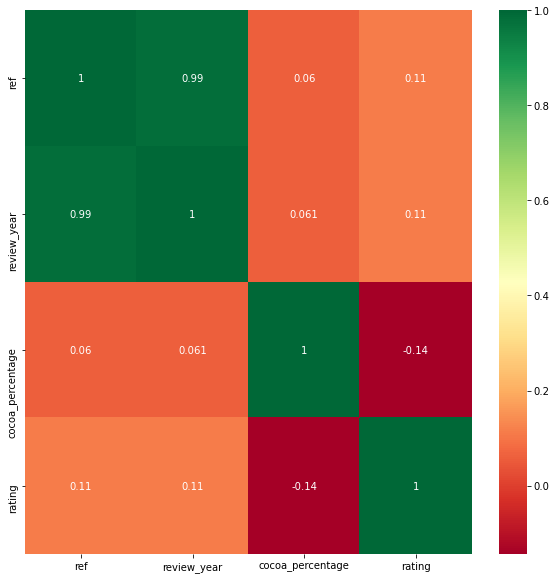

In [25]:
X = analysis1.iloc[0:9]  #independent columns
y = analysis1.iloc[0:9]    #target column i.e price range
#get correlations of each features in dataset
corrmat = analysis1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(analysis1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Analysis 2

Rating for different countries

In [26]:
data = analysis1
data = pd.concat([pd.Series(row['rating'], row['company_location'].split(',')) for _, row in analysis1.iterrows()]
         ).reset_index()
data.columns = ['company_location', 'rating']
data['mean_rating'] = data.groupby(['company_location'])['rating'].transform('mean')

Text(0.5, 1.0, 'Boxplot, Rating for countries (contributors)')

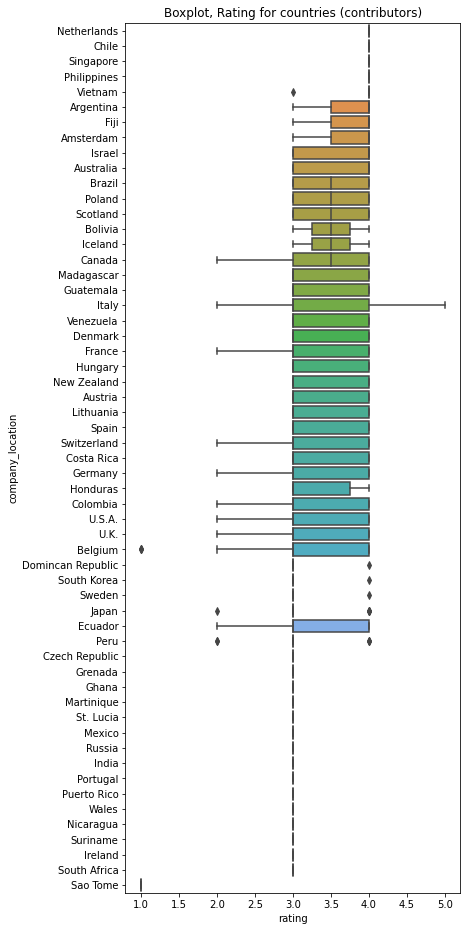

In [27]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=data.sort_values('mean_rating', ascending=False),
    y='company_location',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (contributors)')

Analysis 3

Rating for company location 

Text(0.5, 1.0, 'Boxplot, Rating by Company location')

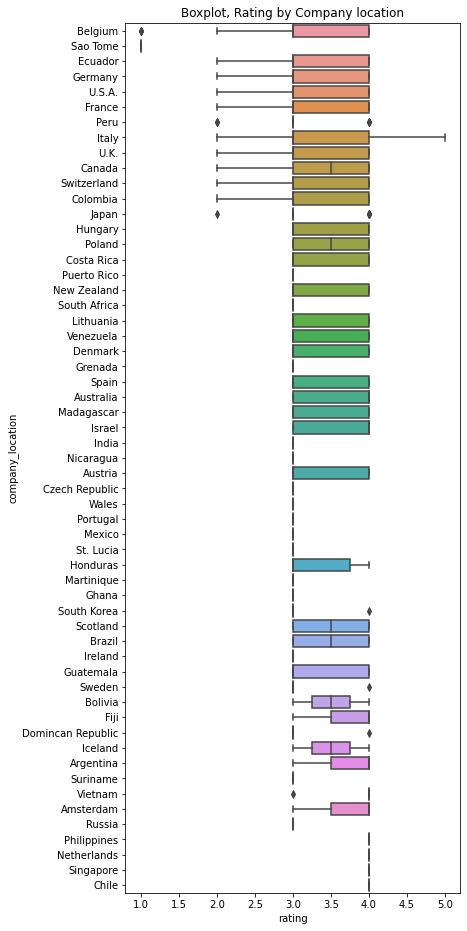

In [28]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=analysis1,
    y='company_location',
    x='rating'
)
ax.set_title('Boxplot, Rating by Company location')